In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re 
import codecs
import json
import matplotlib.pyplot as plt

In [2]:
pattern = r"shotsData\s+=\s+JSON.parse\(\'(.*?)\'\)"
html = requests.get("https://understat.com/match/14090/")
soup = BeautifulSoup(html.text, "html.parser")
scripts = soup.find_all("script")
pattern = re.compile(pattern)
bytes_data = codecs.escape_decode(re.search(pattern, scripts[1].string).group(1))
json_data = json.loads(bytes_data[0].decode("utf-8"))
json_data.keys()

dict_keys(['h', 'a'])

In [3]:
home = pd.DataFrame.from_dict(json_data['h'])
away = pd.DataFrame.from_dict(json_data['a'])
home['minute'] = home['minute'].astype(int)
away['minute'] = away['minute'].astype(int)

In [4]:
home['total_xG'] = home['xG'].astype(float).cumsum()
away['total_xG'] = away['xG'].astype(float).cumsum()

In [5]:
home_team = home.loc[0, 'h_team']
away_team = away.loc[0, 'a_team']

In [6]:
home_total_xG = [0] + list(home.total_xG)
away_total_xG = [0] + list(away.total_xG)
home_minutes = [0] + list(home.minute)
away_minutes = [0] + list(away.minute)

In [7]:
home_goals = home[home['result'] == 'Goal']
away_goals = away[away['result'] == 'Goal']

In [ ]:
# https://colorhunt.co/palettes/dark
palette = ['#222831', '#393e46', '#d65a31', '#eeeeee', '#87556f']

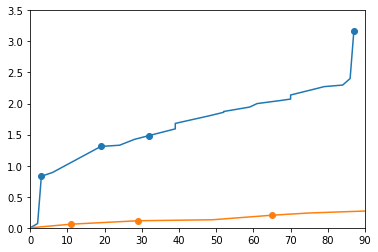

In [8]:
fig, ax = plt.subplots()

ax.set_xlim(0, 90)
ax.set_ylim(0, 3.5)

ax.plot(home_minutes, home_total_xG)
ax.plot(away_minutes, away_total_xG)

ax.scatter(home_goals.minute, home_goals.total_xG)
ax.scatter(away_goals.minute, away_goals.total_xG)

plt.show()